# Automated Collation

In [ ]:
# Import required libraries
import os # For filesystem operations
import csv # (Note: CSV module is imported but not used in current code)

# Initialize empty list to store witness data
witnesses = []

# Get list of all files in the 'witnesses' directory
files = os.listdir('witnesses')
# Iterate through each file in the directory
for f in files:
    # Process only text files (ending in .txt)
    if f.endswith('.txt'):
        # Extract the filename without .txt extension to use as witness identifier (sigil)
        sigil = f.replace('.txt', '')
        # Construct the full path by joining the directory and filename
        # This ensures proper path handling across different operating systems
        filepath = os.path.join('witnesses', f)
        # Open and read the witness file
        with open(filepath) as fh:
            # Create a dictionary for this witness containing:
            #   - id: the filename without extension (sigil)
            #   - content: the full text content of the file
            thiswitness = {'id': sigil, 'content': fh.read()}
            # Add this witness dictionary to our list of witnesses
            witnesses.append(thiswitness)

# Create final data structure with 'witnesses' as key
input = {'witnesses': witnesses}
# Display the resulting data structure
input

{'witnesses': [{'id': 'K',
   'content': 'DE ORDINE AC POSITIONE STELLARUM IN SIGNIS est quidem hic ordo et positio siderum quae fixa caelo plurium coacervatione stellarum insignum aliquod formata vel fabulose variarum genera formarum in caelum recepta creduntur quorum nomina non naturae constitutio sed humana persuasio quae stellis numeros et nomina fecit adinvenit sed quia iuxta aratum numerus stellarum unicuique signo adscriptus est eo quo ab ipso est ordine digesta descriptio proferatur Haelice arcturus maior habet stellas in capite VII in singulis umeris singulas in armo I in pectore I in pede priori claras duas in summa cauda claram unam in ventre claram unam in crure posteriori duas in extremo pede duas in cauda III fiunt XXII Cinosura arcturus minor habet stellas in uno latere IIII claras in quadro positas in cauda claras III fiunt VII sub his apparet sidus quod vocatur polus circum quod putatur totus orbis verti Serpens qui inter arcturos medius iacet habet stellas in capite c

In [ ]:
# Import the JSON module for handling JSON data
import json

# Open a file named 'input.json' in write mode ('w')
# The 'with' statement ensures proper file handling and automatic closing
with open('input.json', 'w') as fh:
    # Write the 'input' dictionary to the file in JSON format
    # ensure_ascii=False allows non-ASCII characters (like Unicode) to be written as-is
    # instead of being escaped to ASCII sequences
    json.dump(input, fh, ensure_ascii=False)

In [ ]:
# Execute the CollateX Java program (version 1.7.1) using Java Runtime
# The ! indicates this is being run from within a notebook/shell environment

!java -jar collatex-tools-1.7.1.jar -f csv -o collation.csv -t input.json
# Set output format to CSV, specify output file name, specify input file (our previously created JSON file)

# With numbers of stars

## The *Leitfehler* detection method of Roelli & Bachmann

In [ ]:
# Install the Perl module Algorithm::Diff using CPAN (Comprehensive Perl Archive Network)
# The 'echo yes' automatically answers "yes" to any installation prompts
!echo 'yes' | cpan Algorithm::Diff

Loading internal logger. Log::Log4perl recommended for better logging

CPAN.pm requires configuration, but most of it can be done automatically.
If you answer 'no' below, you will enter an interactive dialog for each
configuration option instead.

Would you like to configure as much as possible automatically? [yes] Fetching with HTTP::Tiny:
http://www.cpan.org/authors/01mailrc.txt.gz
Reading '/root/.cpan/sources/authors/01mailrc.txt.gz'
............................................................................DONE
Fetching with HTTP::Tiny:
http://www.cpan.org/modules/02packages.details.txt.gz
Reading '/root/.cpan/sources/modules/02packages.details.txt.gz'
  Database was generated on Wed, 01 Jan 2025 14:52:45 GMT
  HTTP::Date not available
..............
  New CPAN.pm version (v2.38) available.
  [Currently running version is v2.28]
  You might want to try
    install CPAN
    reload cpan
  to both upgrade CPAN.pm and run the new version without leaving
  the current session.


......

In [ ]:
!pip install pandas==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
plotnine 0.14.4 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
xarray 2024.11.0 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.


In [ ]:
import csv

textlist = dict()

with open('collation.csv', encoding='ISO-8859-15', newline='') as f:
    reader = csv.DictReader(f, delimiter=',', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        textlist[sigil] = []
    for row in reader:
        # Get the appropriate reading and add it to the appropriate list
        for sigil in reader.fieldnames:
            reading = row[sigil]
            # Check if reading is not None and not an empty string before appending
            if reading is not None and reading != '':
                textlist[sigil].append(reading)

with open('deordine_all.txt', 'w', encoding='utf-8') as f:
    for sigil in textlist.keys():
        # Filter out None values before joining
        line = "%s     %s" % (sigil.replace('.txt', ''), ' '.join([str(x) for x in textlist[sigil] if x is not None]))
        print(line)
        f.write("%s\n" % line)

A     est  quidem  hic  ordo  et  positio  siderum  quae  fixa  caelo  plurium  coacervatione  stellarum  insignum  aliquod  formata  vel  fabulose  variarum  genera  formarum  incaelum  recepta  quorum  nomina  non  naturae  constitutio  sed  humana  persuasio  quae  stellis  numeros  et  nomina  adinvenit  sed  quia  iuxta  aratum  numerus  stellarum  unicuique  signo  asscriptus  est  eo  quo  ab  ipso  est  ordine  digesta  descriptio  proferatur  helice  id  est  arcturus  maior  habet  stellas  in  capite  VII  in  singulis  humeris  singulas  in  armo  I  in  pectore  I  in  pede  priori  claras  II  in  summa  cauda  claram  I  in  ventre  claram  I  in  crure  posteri  II  in  extremo  pede  II  in  cauda  III  fiunt  XXII  [C]inosura  id  est  arcturus  minor  habet  stellas  in  uno  latere  positas  in  quadro  claras  IIII  in  cauda  claras  III  fiunt  VII  sub  his  apparet  sydus  quod  vocatur  polus  circum  quod  putatur  totus  orbis  verti  [S]erpens  qui  inter  

In [ ]:
# Run the Perl script lf_new4.pl with deordine_all.txt as input
# Redirect the output (>) to a file named 'infile'
!perl lf_new4.pl deordine_all.txt > infile

In [ ]:
# Install PHYLIP (PHYLogeny Inference Package) using the apt package manager
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  phylip-doc
The following NEW packages will be installed:
  phylip
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 906 kB of archives.
After this operation, 5,574 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 phylip amd64 1:3.697+dfsg-2 [906 kB]
Fetched 906 kB in 0s (7,703 kB/s)
Selecting previously unselected package phylip.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../phylip_1%3a3.697+dfsg-2_amd64.deb ...
Unpacking phylip (1:3.697+dfsg-2) ...
Setting up phylip (1:3.697+dfsg-2) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libhwloc.so

For the next line of code, change Lower-triangular data matrix? to "yes".

In [ ]:
# Execute the 'fitch' program from the PHYLIP package
# Located in the standard PHYLIP installation directory
!/usr/lib/phylip/bin/fitch



Fitch-Margoliash method version 3.697

Settings for this run:
  D      Method (F-M, Minimum Evolution)?  Fitch-Margoliash
  U                 Search for best tree?  Yes
  P                                Power?  2.00000
  -      Negative branch lengths allowed?  No
  O                        Outgroup root?  No, use as outgroup species  1
  L         Lower-triangular data matrix?  No
  R         Upper-triangular data matrix?  No
  S                        Subreplicates?  No
  G                Global rearrangements?  No
  J     Randomize input order of species?  No. Use input order
  M           Analyze multiple data sets?  No
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                        Print out tree  Yes
  4       Write out trees onto tree file?  Yes

  Y to accept these or type the letter for one to change
l

Fitch-Margoliash method version 3.697

Settings for this run:
  D    

In [ ]:
# Display the contents of the 'outtree' file
# This file contains the tree output from the Fitch program
!cat outtree

(((((S:332.21398,N:616.78602):58.97527,W:412.34871):36.98816,
((C:366.37608,((U:262.84661,R:280.15339):26.24611,Q:350.69421):43.31830):49.10204,
(P:431.76898,(T:290.83899,((L:129.97122,K:61.02878):27.87728,
B:122.51987):64.95909):105.05111):84.58947):57.71693):30.69100,
((V:662.68059,(O:575.26304,H:806.73696):91.33719):72.47592,
((F:345.52057,(X:281.34967,E:381.65033):178.46135):450.23429,
D:764.07525):459.26749):116.35162):36.38912,(M:812.89943,
G:278.10057):142.57530,A:741.20827);


Input the matrix here: http://www.trex.uqam.ca/index.php?action=newick&project=trex

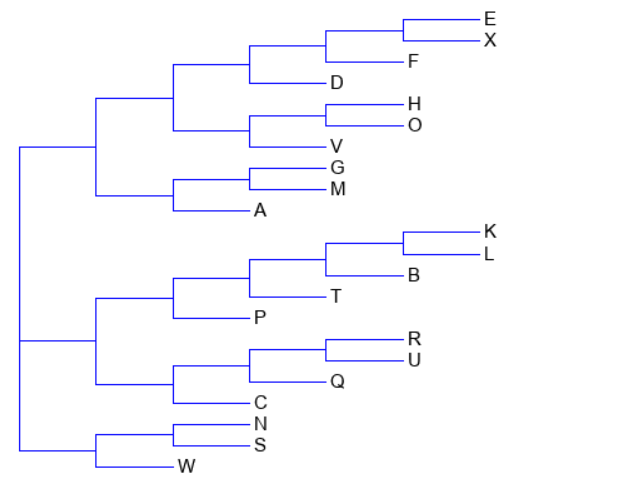

In [ ]:
# Run the Perl script lf_new4.pl with deordine_all.txt as input
# Unlike the earlier command, this time the output is not being redirected to a file
!perl lf_new4.pl deordine_all.txt

22
A         
B          1203 
C          1190  775 
D          2187  2051  1691 
E          2415  2272  1912  1730 
F          2199  1977  1736  1631  894 
G          1142  832  900  1953  2077  1882 
H          1921  1655  1768  1699  2326  2230  1682 
K          1215  207  758  2025  2211  1924  885  1612 
L          1285  289  812  2002  2233  1957  948  1634  191 
M          1743  1631  1621  2214  2285  2090  1091  1865  1612  1649 
N          1649  1218  1301  2175  2324  2130  1189  1412  1129  1240  1575 
O          1593  1266  1450  1809  2421  2222  1363  1382  1201  1268  1821  1729 
P          1382  762  1005  2005  2279  2042  1141  1619  688  741  1723  1086  1296 
Q          1384  748  817  1770  2014  1759  977  1879  738  788  1673  1316  1409  1034 
R          1219  869  699  1642  1826  1588  894  1668  794  903  1508  1024  1470  1007  659 
S          1293  919  920  1961  2089  1908  944  1457  816  895  1274  949  1318  841  1074  827 
T          1360  451  915  

Enter the matrix here: http://www.trex.uqam.ca/index.php?action=phylip&app=fitch

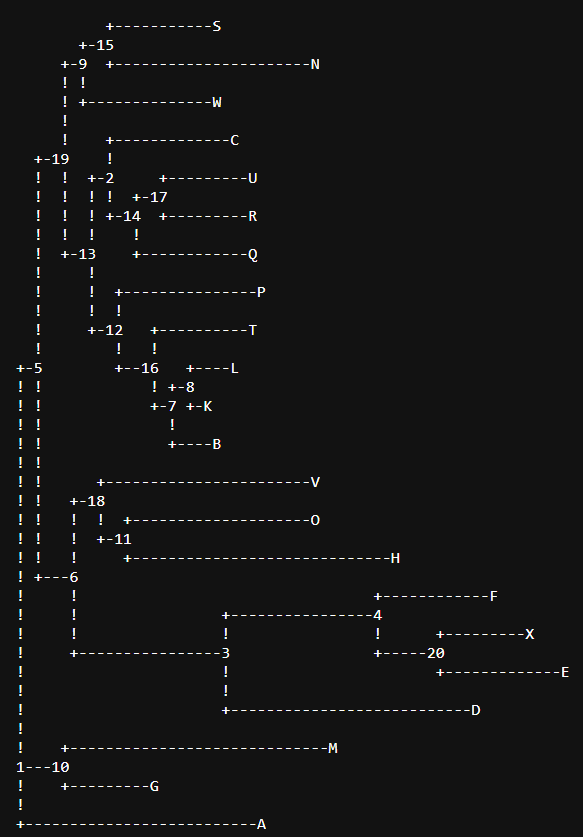

## Making a character matrix

In [ ]:
import csv

with open('collation.csv', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f) # we have added the option here
    print(reader.fieldnames)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']


In [ ]:
with open('collation.csv', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f, delimiter=',',quoting=csv.QUOTE_NONE)
    rownum = 1
    for row in reader:
      for k in row.keys():
        if row[k] is None:
          print("Found a None cell on row %d column %s" % (rownum, k))
          print("Whole row is %s" % row.values())
      rownum += 1

print("Column labels are %s" % reader.fieldnames)

Column labels are ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']


In [ ]:
char_matrix = dict()
locations = 0


In [ ]:
with open('collation.csv', encoding='utf-8', newline='') as f:
    reader = csv.DictReader(f, delimiter=',', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        char_matrix[sigil] = ''


    for row in reader:
        unique = set()
        unique.update(row.values())

        if len(unique) < 2 or len(unique) > 8:
            continue

        locations += 1

        characters = dict()
        ctr = 0
        for item in unique:
            characters[item] = chr(65+ctr)
            ctr +=1

        for sigil in row.keys():
            char_matrix[sigil] += characters[row[sigil]]

char_matrix['A']

'AAAAAAAAABBBCBBABCCBBBABBBBBBBBABABBBBBBBAABBBBAABBBBBBBBBCABCBBAABBBBDCABBBBBBBBCCCABBEBBBBBBBEBBBACBAACBADBBBBDBBCBCCCABBBBBBBABABAABBBBBCCBBCABABABAACCBBBABBABABABCABBABBBAABABBACBBBABAABBABABBBBCCBBBABAACBCBACAAABABBABBBABBABBABBCBBBBBCBBECACABBBABBCCBBACBCABBCBABCADABAACAABBCABBAAABAAABCBBBAABBABACBBBCBBABACBADAAAAABBBBCBCBAACBBCBCBCBCCACCCBBADBCBBADBCBDCDACCCCAADBCBACCBBBDBBBBABCBBCBBAFAAAAAAAAAAAAAAAAAAAABBBBCBCABBBBACCECCBACDABBBCABAAACBABAAAACAAABAACAACAAAAAAAAAAAAAAAAAACCABABAABAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAACBCCCBBBCCBBABABBAAAABAABAABABACAACBABAACBCCBDCECCCCAAAAAAAAAABABBBABBBBACBACAACACBBBBCBCBCCCGCAAAABBCBBCCBBCBCBDBBBCBCBCBBCBBBDABACBBBBBBEBAACAAADAABBAABBCAAABCABCDBBBBBBADBBBDBBCBCACBBBBBDBBDCEDBCABBBBBABABBBBBABDCBBBBCABABBAABBACBBDBBBCAAAAABCECCBAAAAAAAADBAACCCDACCBCBCBCDAACBCBBBABBBCCBCCBBAAABABBBBCBCCCABBBACCBCBCBBBAABABBBBACABBDCBBBBBBBBBBBBCFACBABBCBBBBBAAAACBCCCCAABBBBAABBCBBBAAAABDBBDBABABABBCCBAAAABBBBAAAACBBBABBBACBBBABCBABAABBACBBBBBBBBCBBACCCDCBB

In [ ]:
with open('infile', 'w') as f:
    f.write("%d    %d\n" % (len(char_matrix.keys()), locations))
    for sig in char_matrix.keys():
        f.write("%s%s\n" % (sig.replace('.txt', '').ljust(10), char_matrix[sig]))

In [ ]:
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
phylip is already the newest version (1:3.697+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!/usr/lib/phylip/bin/pars


pars: the file "outfile" that you wanted to
     use as output file already exists.
     Do you want to Replace it, Append to it,
     write to a new File, or Quit?
     (please type R, A, F, or Q) 
r

Discrete character parsimony algorithm, version 3.697

Setting for this run:
  U                 Search for best tree?  Yes
  S                        Search option?  More thorough search
  V              Number of trees to save?  100
  J     Randomize input order of species?  No. Use input order
  O                        Outgroup root?  No, use as outgroup species 1
  T              Use Threshold parsimony?  No, use ordinary parsimony
  W                       Sites weighted?  No
  M           Analyze multiple data sets?  No
  I            Input species interleaved?  Yes
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                        Print out tree  Yes
  4          Print out steps 

In [ ]:
!cat outtree

((M:407.90,G:67.93):95.56,((P:120.31,(((V:465.08,O:165.87):178.49,H:292.63):116.86,((F:142.90,(X:142.53,E:190.54):92.25):341.00,D:537.39):284.78):144.86):36.59,((W:82.45,(S:72.96,N:160.16):44.90):21.31,((((U:55.16,R:58.68):17.15,Q:143.47):39.76,
C:91.03):32.85,(T:64.47,((L:32.82,K:10.51):6.50,B:22.12):8.40):36.24):23.45):24.70):36.69,A:250.71);


Input the matrix here: http://www.trex.uqam.ca/index.php?action=newick&project=trex

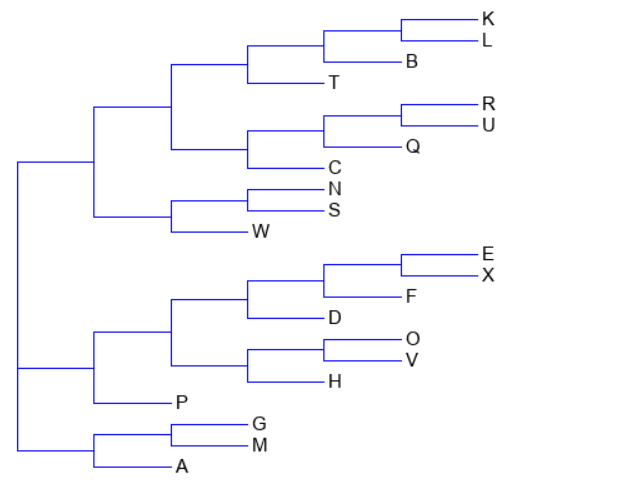





## Weighting variants for parsimony calculation

In [ ]:
!echo 'Yes' | perl -MCPAN -e 'install Algorithm::Diff'

Reading '/root/.cpan/Metadata'
  Database was generated on Wed, 01 Jan 2025 14:52:45 GMT
Algorithm::Diff is up to date (1.201).


In [ ]:
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
phylip is already the newest version (1:3.697+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!perl lf_new4.pl < deordine_all.txt > matrix

In [ ]:
leitfehler = dict()

with open('log', encoding='utf-8') as f:
    for line in f:
        # We want the word (first thing in line) and the percentage (second thing in line)
        parts = line.rstrip().split()
        reading = parts[0]
        weight = int(parts[5].replace('%', '')) / 10
        if reading not in leitfehler:
          leitfehler[reading] = weight
        print("%s, %d" % (reading, weight))
        leitfehler[reading] = weight


Lepos, 10
caelum, 9
arctophylax, 8
SIGNIS, 7
umero, 7
adscriptus, 7
syderum, 6
pinnis, 6
assignantur, 6
due, 6
sinistru, 6
ericthonium, 5
nature, 5
piscis, 5
Boetes, 5
Cassepia, 5
tyrso, 5
Cenosura, 5
heridanus, 5
SIGNORUM, 5
illius, 5
ventro, 5
ceterae, 5
asscriptus, 5
nubecula, 5
baltheo, 5
cetere, 5
tirso, 5
quinque, 5
delton, 5
totus, 5
fabulosae, 5
sagittae, 5
artophylax, 5
notus, 5
ascriptus, 4
thyrso, 4
XIX, 4
erichtonium, 4
ungulis, 4
appellunt, 4
Cynosura, 4
STELLARUM, 4
appellantur, 4
balteo, 4
borei, 4
signum, 4
XXIII, 4
labiis, 4
positae, 4
haedi, 3
chele, 3
notata, 3
clarior, 3
grece, 3
dicitur, 3
fidis, 3
sibi, 3
posterioribus, 3
invicem, 3
potius, 3
stellis, 3
priores, 3
tenentis, 3
Libre, 3
facie, 3
tenentes, 3
septem, 3
siglis, 3
caeterae, 3
posite, 3
XXII, 3
VIIII, 3
sedet, 3
hiades, 3
selle, 3
Andromeda, 3
pennulis, 3
arctophilax, 3
aquilonalis, 3
chelae, 3
tauri, 3
posteriore, 3
clava, 3
foemore, 3
dexteram, 2
Scorpione, 2
post, 2
anteriores, 2
visis, 2
boetis, 2
te

In [ ]:
import csv

char_matrix = dict()
locations = 0
weights = '' ## NEW: the set of, one weight per variant location

with open('collation.csv', encoding='ISO-8859-15', newline='') as f:
    reader = csv.DictReader(f, delimiter=',', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        char_matrix[sigil] = ''
    for row in reader:
        unique = set()
        # Filter out None values before calling rstrip()
        unique.update([x.rstrip() for x in row.values() if x is not None])

        if len(unique) < 2 or len(unique) > 8:
            continue

        locations += 1
        maxweight = 0  ## NEW: Keep track of the highest reading weight we find in this location
        characters = dict()
        ctr = 0
        for item in unique:
            characters[item] = chr(65+ctr)
            ctr += 1
            ## NEW: Look to see if there is a weight for this reading and if it is the highest so far
            if item in leitfehler:
                if maxweight < leitfehler[item]:
                    maxweight = leitfehler[item]
        ## NEW: Record the highest weight we found for this location in the 'weights' array
        weight = 'A' if maxweight == 10 else "%d" % maxweight
        weights += weight

        for sigil in row.keys():
            # Handle None values when accessing row[sigil]
            # If row[sigil] is None or empty, add a placeholder character (e.g., '-') to char_matrix
            char_matrix[sigil] += characters.get(row[sigil].rstrip() if row[sigil] is not None else '', '-')

print(char_matrix)
print(weights)

{'A': 'AAAAAAAACBABBBBBBACBBCABBBABBBBABABBBCAABBBBBBBAABABBBBBABCBBCBBABBBBBBCBBBBBBBCBCBCABADBAABBCBCBBBBABBBABBABBBBCBBBBEBDBBBBBBBBABABBABBBBBBBDACABABAAAACBBAABBBABAABBCCBBABBBCABABBCBCBAABAACBABABCCADBCBBABBAAACBACAAACBABBBBBCBBBBBABCACBBCBBBBDCCBABBBBABBBBBBDCBACBCBAACADABACDAABBCABBCBACAAAABBBBAABBABABBBBBBBABCBDBEAAAAABBBBDBCBCBBBBCCCBCCBABCCCCBBDBBDBCCBFACDCCCBBCBBEBBBACBABBCBBBCBBBBBBDACGAAAAAAAAAAAAAAAAAAAABBBBDBCBBBBBCDCCBDBBDCBBBABABBAACBABABAACABABAABADDAAAAAAAAAAAAAAAAAACDABABAABAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBABCBCBCBBCCCBBAAABBAADABAABAABABACAACBABABBBCCDBCDCCCCAAAAAAAAAAABABBBBBBBDDBACAABACBBBBCBCBCCCDDAAAABBABBBCBDCBCBDBACCBCADBBCBCBDBBBBACBBBADCBBBBBBFBCCBBCBBAAAABCBBCCBBBBBBADBBBDBBCBBBCBBBBBDBCDBBCCDBBABBBBBBCBBABBBCCBBBBCABAADAABAACBBDBBBCAAAAAAADCCBAAAAAAABCABCDCCDCDCACBAACCABCBCABBABBBACDBCDBAABAACCBBCBCBCABBBCCABCBCBABAABABBBBCBABBBBBBBBBABBBABBACDCAABBCBBBBAAAAACBCCCACAABAAABBCCCDCBBAABCBBCABAAAABBBBFAAAABBBBAAAACBBBBABBBABBCCACBABAAABBBBBBBCBBACBABA

In [ ]:
if len(weights) == locations:
    print("Looking good")
else:
    print("Uh-oh! We have %d variant locations but %d assigned weights." % (locations, len(weights)))

Looking good


In [ ]:
with open('infile', 'w') as f:
    f.write("%d    %d\n" % (len(char_matrix.keys()), locations))
    for sig in char_matrix.keys():
        f.write("%s%s\n" % (sig.replace('.txt', '').ljust(10), char_matrix[sig]))

with open('weights', 'w') as f:
    for w in weights:
        f.write(w)
    f.write("\n")

In [ ]:
!/usr/lib/phylip/bin/pars


pars: the file "outfile" that you wanted to
     use as output file already exists.
     Do you want to Replace it, Append to it,
     write to a new File, or Quit?
     (please type R, A, F, or Q) 
r

Discrete character parsimony algorithm, version 3.697

Setting for this run:
  U                 Search for best tree?  Yes
  S                        Search option?  More thorough search
  V              Number of trees to save?  100
  J     Randomize input order of species?  No. Use input order
  O                        Outgroup root?  No, use as outgroup species 1
  T              Use Threshold parsimony?  No, use ordinary parsimony
  W                       Sites weighted?  No
  M           Analyze multiple data sets?  No
  I            Input species interleaved?  Yes
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                        Print out tree  Yes
  4          Print out steps 

In [ ]:
!cat outtree

((M:406.35,G:68.49):95.56,((P:120.42,(((V:465.08,O:164.54):177.91,H:290.81):117.03,((F:142.20,(X:141.53,E:190.54):91.65):340.40,D:537.29):284.78):144.32):36.59,((W:82.45,(S:72.96,N:159.16):44.90):21.31,((((U:55.16,R:58.68):17.15,Q:143.47):38.76,
C:91.03):32.85,(T:63.47,((L:32.82,K:10.51):6.50,B:22.12):8.40):36.24):23.45):24.81):37.13,A:250.16);


Enter in http://www.trex.uqam.ca/index.php?action=newick&project=trex

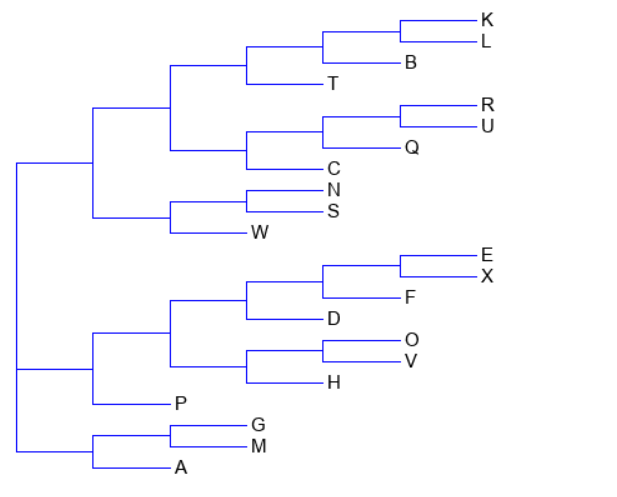

# Without numbers of stars

## Remove Roman numerals

In [ ]:
import pandas as pd
import re

# Read your CSV file
df = pd.read_csv('collation.csv')  # Replace with your file name

# Function to check for Roman numerals
def is_roman_numeral(text):
    if not isinstance(text, str):
        return False
    pattern = r'\b[IVXLCDM]+\b'
    valid_pattern = r'^M{0,3}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$'
    matches = re.findall(pattern, text.upper())
    return any(re.match(valid_pattern, match) for match in matches)

# Create a mask that identifies rows containing Roman numerals in any column
mask = ~df.astype(str).apply(lambda x: x.apply(is_roman_numeral)).any(axis=1)

# Filter the dataframe to keep only rows without Roman numerals
df_cleaned = df[mask]

# Save the cleaned dataframe to a new CSV file
df_cleaned.to_csv('cleaned_collation.csv', index=False)  # Replace with your desired output filename

# Print some info about what was removed
print(f"Original rows: {len(df)}")
print(f"Rows after removing Roman numerals: {len(df_cleaned)}")
print(f"Number of rows removed: {len(df) - len(df_cleaned)}")

Original rows: 2137
Rows after removing Roman numerals: 1737
Number of rows removed: 400


## The *Leitfehler* detection method of Roelli & Bachmann

In [ ]:
import csv

textlist = dict()

with open('cleaned_collation.csv', encoding='ISO-8859-15', newline='') as f:
    reader = csv.DictReader(f, delimiter=',', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        textlist[sigil] = []
    for row in reader:
        # Get the appropriate reading and add it to the appropriate list
        for sigil in reader.fieldnames:
            reading = row[sigil]
            # Check if reading is not None and not an empty string before appending
            if reading is not None and reading != '':
                textlist[sigil].append(reading)

with open('deordine_all2.txt', 'w', encoding='utf-8') as f:
    for sigil in textlist.keys():
        # Filter out None values before joining
        line = "%s     %s" % (sigil.replace('.txt', ''), ' '.join([str(x) for x in textlist[sigil] if x is not None]))
        print(line)
        f.write("%s\n" % line)
print("Leitfehler-detection input file generated")

A     est  quidem  hic  ordo  et  positio  siderum  quae  fixa  caelo  plurium  coacervatione  stellarum  insignum  aliquod  formata  vel  fabulose  variarum  genera  formarum  incaelum  recepta  quorum  nomina  non  naturae  constitutio  sed  humana  persuasio  quae  stellis  numeros  et  nomina  adinvenit  sed  quia  iuxta  aratum  numerus  stellarum  unicuique  signo  asscriptus  est  eo  quo  ab  ipso  est  ordine  digesta  descriptio  proferatur  helice  id  est  arcturus  maior  habet  stellas  in  capite  in  singulis  humeris  singulas  in  armo  in  pectore  in  pede  priori  claras  in  summa  cauda  claram  in  ventre  claram  in  crure  posteri  in  extremo  pede  in  cauda  fiunt  est  arcturus  minor  habet  stellas  in  uno  latere  positas  in  quadro  claras  IIII  in  cauda  claras  fiunt  sub  his  apparet  sydus  quod  vocatur  polus  circum  quod  putatur  totus  orbis  verti  [S]erpens  qui  inter  arcturos  medius  iacet  habet  stellas  in  capite  claras  in  c

In [ ]:
!echo 'yes' | cpan Algorithm::Diff

Loading internal logger. Log::Log4perl recommended for better logging
Reading '/root/.cpan/Metadata'
  Database was generated on Wed, 01 Jan 2025 14:52:45 GMT
Algorithm::Diff is up to date (1.201).


In [ ]:
!perl lf_new4.pl deordine_all2.txt > infile

In [ ]:
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
phylip is already the newest version (1:3.697+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!/usr/lib/phylip/bin/fitch


fitch: the file "outfile" that you wanted to
     use as output file already exists.
     Do you want to Replace it, Append to it,
     write to a new File, or Quit?
     (please type R, A, F, or Q) 
r


Fitch-Margoliash method version 3.697

Settings for this run:
  D      Method (F-M, Minimum Evolution)?  Fitch-Margoliash
  U                 Search for best tree?  Yes
  P                                Power?  2.00000
  -      Negative branch lengths allowed?  No
  O                        Outgroup root?  No, use as outgroup species  1
  L         Lower-triangular data matrix?  No
  R         Upper-triangular data matrix?  No
  S                        Subreplicates?  No
  G                Global rearrangements?  No
  J     Randomize input order of species?  No. Use input order
  M           Analyze multiple data sets?  No
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                  

In [ ]:
!cat outtree

((W:310.08352,((S:250.72484,N:476.27516):60.18708,(((V:481.09440,
O:465.90560):149.07368,(H:708.09648,((F:299.72209,(X:236.41708,
E:359.58292):131.20747):360.03216,D:652.30261):342.13759):103.82399):88.32591,
((C:289.13742,((U:177.14289,R:220.85711):29.26652,Q:269.50369):56.60160):44.78235,
(P:322.82670,(T:185.22343,((L:94.86582,K:52.13418):28.76458,
B:72.02579):53.23520):47.14179):97.82069):34.52858):29.21117):32.33850):14.17833,
(M:519.08385,G:193.91615):105.79066,A:438.42650);


Input the matrix here: http://www.trex.uqam.ca/index.php?action=newick&project=trex

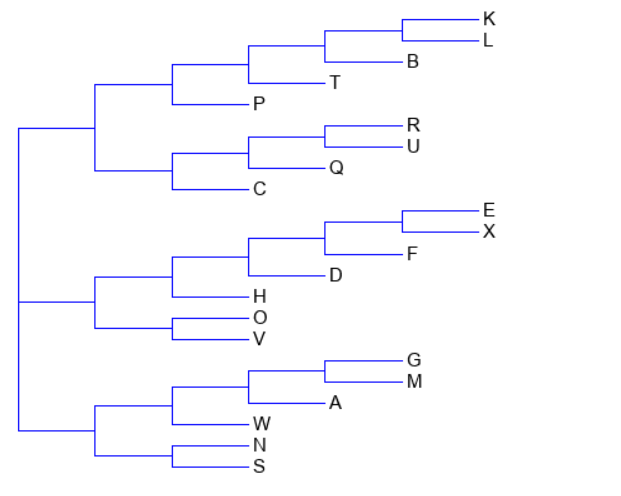

In [ ]:
!perl lf_new4.pl deordine_all2.txt

22
A         
B          804 
C          791  568 
D          1710  1697  1443 
E          1903  1883  1599  1473 
F          1714  1649  1458  1350  791 
G          713  615  686  1656  1785  1580 
H          1415  1314  1429  1457  2012  1888  1372 
K          833  151  610  1703  1855  1624  677  1273 
L          875  199  631  1658  1855  1632  712  1304  147 
M          1126  1145  1153  1766  1795  1614  713  1439  1115  1157 
N          1170  935  1013  1837  1932  1752  950  1095  874  981  1122 
O          1155  957  1221  1568  2108  1930  1127  1162  920  959  1435  1390 
P          934  526  811  1727  1944  1711  857  1334  498  533  1238  848  1020 
Q          1007  592  646  1472  1682  1472  791  1556  614  625  1235  1100  1181  833 
R          854  716  575  1415  1552  1359  710  1398  669  753  1053  810  1245  861  537 
S          883  675  753  1683  1751  1603  706  1149  619  671  864  727  1072  715  857  683 
T          898  283  706  1764  1973  1750  783  14

Enter the matrix here: http://www.trex.uqam.ca/index.php?action=phylip&app=fitch

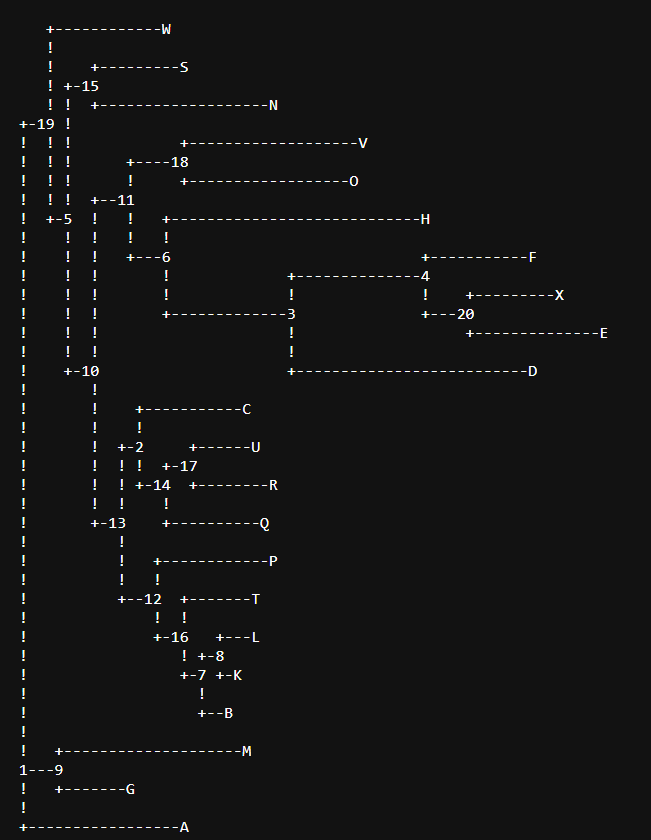

## Making a character matrix

In [77]:
import csv

with open('cleaned_collation.csv', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f) # we have added the option here
    print(reader.fieldnames)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']


In [78]:
with open('cleaned_collation.csv', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f, delimiter=',',quoting=csv.QUOTE_NONE)
    rownum = 1
    for row in reader:
      for k in row.keys():
        if row[k] is None:
          print("Found a None cell on row %d column %s" % (rownum, k))
          print("Whole row is %s" % row.values())
      rownum += 1

print("Column labels are %s" % reader.fieldnames)

Column labels are ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']


In [79]:
char_matrix = dict()
locations = 0


In [80]:
with open('cleaned_collation.csv', encoding='utf-8', newline='') as f:
    reader = csv.DictReader(f, delimiter=',', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        char_matrix[sigil] = ''


    for row in reader:
        unique = set()
        unique.update(row.values())

        if len(unique) < 2 or len(unique) > 8:
            continue

        locations += 1

        characters = dict()
        ctr = 0
        for item in unique:
            characters[item] = chr(65+ctr)
            ctr +=1

        for sigil in row.keys():
            char_matrix[sigil] += characters[row[sigil]]

char_matrix['A']

'AAAAAAAAABBBCBBABCCBBBABBBBBBBBABABBBBBBBAABBBBAABBBBBBBBBCABCBBAABBBBDCABBBBBBBCCCABBBBBBBBBBBABAABADBBBBBBABBBBBBBABABAABBBBBCBCABABABAACCBBBABBABABABCABBABBBABABBCBBABAABBABABBCCBBBAABBAAAABBABBBABBABBBBBBBCBBCACABBBABBCCBBBCABBCABAABAACAABBCABBAABAABCBBBAABBABABBBCBBABAAAAAABBBBCBCBACBBBCBCACBBABCBABDDACCCCAADBCBACCBBBDBBBBABCBBCBBAFAAAAAAAAAAAAAAAAAABBBBCBCABBBBCECCBACDABBBCBAAACBBAAAAABACAACAAAAAAAAAAAAAAACCABABAABAABAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAABCCCBBBCBBABBAAAABAABAABABACAACBABAACBCCBCCCAAAAAAAAAABABBBABBBBBACAACACBBBBBCBCCCGCAAABCBBCBBCBCBBBBBCBBBCBBBABACBBBBAACAAADAABBAABBCAAABCABCDBBBBBBABBBBBBCABBBBBBBCDBABBBBBABABBBBBABDBBBBCBABABBBBBBBAAAABCCBAAAAAABACCDACBBCBDABBBBBBBCCCCBBAABABBBBBCCCABBBACCBCBCBBBAABBBBACABBCBBBBBBBBBBFCBABBBBBBAAABCCCBBABCBBAAAABDBBBABABABBCCAAAABBBBAAABBBABBABBABABAABABBBBBBBBBACCCBABBBACCCCBCBABBBCBBBBBABBBCBBBBBBBBDAABBAAABABBABABAAAAAAABBBABBBBCCCBBBBCBBBBBBCDCBBBBCBBBBBBBDCBBBCCBABBBBBBABBBBBABBAAAAAABAABBBABABBBCCEBABBCABCBBBBBCDBCBBBBBBBBC

In [81]:
with open('infile', 'w') as f:
    f.write("%d    %d\n" % (len(char_matrix.keys()), locations))
    for sig in char_matrix.keys():
        f.write("%s%s\n" % (sig.replace('.txt', '').ljust(10), char_matrix[sig]))

In [82]:
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
phylip is already the newest version (1:3.697+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [83]:
!/usr/lib/phylip/bin/pars


pars: the file "outfile" that you wanted to
     use as output file already exists.
     Do you want to Replace it, Append to it,
     write to a new File, or Quit?
     (please type R, A, F, or Q) 
r

Discrete character parsimony algorithm, version 3.697

Setting for this run:
  U                 Search for best tree?  Yes
  S                        Search option?  More thorough search
  V              Number of trees to save?  100
  J     Randomize input order of species?  No. Use input order
  O                        Outgroup root?  No, use as outgroup species 1
  T              Use Threshold parsimony?  No, use ordinary parsimony
  W                       Sites weighted?  No
  M           Analyze multiple data sets?  No
  I            Input species interleaved?  Yes
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                        Print out tree  Yes
  4          Print out steps 

In [84]:
!cat outtree

((M:243.58,G:39.83):66.08,(W:63.50,(((U:24.20,(R:36.82,Q:116.16):9.65):34.87,C:70.94):29.22,(((S:49.49,N:125.96):23.29,(P:79.98,(((V:367.52,O:131.30):141.99,H:234.96):82.84,((F:105.36,(X:114.67,E:154.49):74.46):268.97,D:429.15):253.79):122.42):34.18):15.45,
(T:32.33,(L:18.50,(K:7.83,B:15.17):3.33):6.50):20.60):14.98):14.64):31.75,A:156.25);


Input the matrix here: http://www.trex.uqam.ca/index.php?action=newick&project=trex

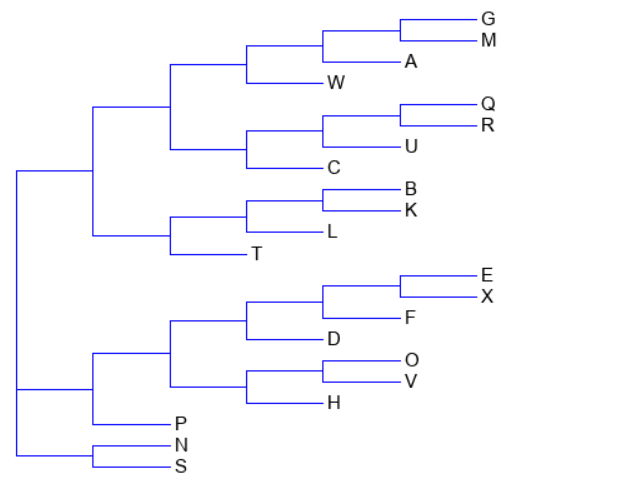

## Weighting variants for parsimony calculation

In [ ]:
!echo 'Yes' | perl -MCPAN -e 'install Algorithm::Diff'

Reading '/root/.cpan/Metadata'
  Database was generated on Wed, 01 Jan 2025 14:52:45 GMT
Algorithm::Diff is up to date (1.201).


In [ ]:
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
phylip is already the newest version (1:3.697+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!perl lf_new4.pl < deordine_all2.txt > matrix

In [ ]:
leitfehler = dict()

with open('log', encoding='utf-8') as f:
    for line in f:
        # We want the word (first thing in line) and the percentage (second thing in line)
        parts = line.rstrip().split()
        reading = parts[0]
        weight = int(parts[5].replace('%', '')) / 10
        if reading not in leitfehler:
          leitfehler[reading] = weight
        print("%s, %d" % (reading, weight))
        leitfehler[reading] = weight


caelum, 10
arctophylax, 9
SIGNIS, 8
adscriptus, 7
umero, 7
syderum, 7
pinnis, 6
assignantur, 6
sinistru, 6
nature, 6
ericthonium, 5
asscriptus, 5
fronte, 5
tyrso, 5
binas, 5
illius, 5
piscis, 5
Cetus, 5
SIGNORUM, 5
heridanus, 5
ceterae, 5
ventro, 5
tirso, 5
cetere, 5
baltheo, 5
delton, 5
fabulosae, 5
totus, 5
nubecula, 5
sagittae, 5
notus, 5
artophylax, 5
ascriptus, 5
thyrso, 4
erichtonium, 4
ungulis, 4
STELLARUM, 4
borei, 4
balteo, 4
appellunt, 4
signum, 4
appellantur, 4
chele, 4
Libre, 4
caeterae, 3
tenentis, 3
positae, 3
labiis, 3
facie, 3
tenentes, 3
haedi, 3
grece, 3
invicem, 3
stellis, 3
posterioribus, 3
dicitur, 3
notata, 3
clarior, 3
potius, 3
priores, 3
fidis, 3
sibi, 3
chelae, 3
siglis, 3
sedet, 3
posite, 3
hiades, 3
pennulis, 3
Andromeda, 3
selle, 3
arctophilax, 3
tauri, 3
aquilonalis, 3
foemore, 3
fabulose, 3
stelas, 3
clava, 2
siderum, 2
posteriore, 2
pedes, 2
boetis, 2
dexteram, 2
tergum, 2
visis, 2
fluxu, 2
Scorpione, 2
calcat, 2
positus, 2
post, 2
anteriores, 2
aedi, 2


In [ ]:
import csv

char_matrix = dict()
locations = 0
weights = '' ## NEW: the set of, one weight per variant location

with open('cleaned_collation.csv', encoding='ISO-8859-15', newline='') as f:
    reader = csv.DictReader(f, delimiter=',', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        char_matrix[sigil] = ''
    for row in reader:
        unique = set()
        # Filter out None values before calling rstrip()
        unique.update([x.rstrip() for x in row.values() if x is not None])

        if len(unique) < 2 or len(unique) > 8:
            continue

        locations += 1
        maxweight = 0  ## NEW: Keep track of the highest reading weight we find in this location
        characters = dict()
        ctr = 0
        for item in unique:
            characters[item] = chr(65+ctr)
            ctr += 1
            ## NEW: Look to see if there is a weight for this reading and if it is the highest so far
            if item in leitfehler:
                if maxweight < leitfehler[item]:
                    maxweight = leitfehler[item]
        ## NEW: Record the highest weight we found for this location in the 'weights' array
        weight = 'A' if maxweight == 10 else "%d" % maxweight
        weights += weight

        for sigil in row.keys():
            # Handle None values when accessing row[sigil]
            # If row[sigil] is None or empty, add a placeholder character (e.g., '-') to char_matrix
            char_matrix[sigil] += characters.get(row[sigil].rstrip() if row[sigil] is not None else '', '-')

print(char_matrix)
print(weights)

{'A': 'AAAAAAAACBABBBBBBACBBCABBBABBBBABABBBCAABBBBBBBAABABBBBBABCBBCBBABBBBBBCBBBBBBBBCBCABABABBCBBBBBBBBBBABBBBBBBBBBBBBBABABBABBBBBBACABABAAAACBBAABBBABAABBCCBBABBBABABBBBAABAACBABABADBBBBBAABAAABABBBBBCBBBBBBCBBBBBBCCBABBBBABBBBBCBACBCAAAABACDAABBCABBCBCAAABBBBAABBABABBBBBBABCBAAAABBBBDBCBCBBBCCCABCCBBBBBCBCCCCBBCBBEBBBACBABBCBBBCBBBBBBDACGAAAAAAAAAAAAAAAAAABBBBDBCBBBBBCCBDBBDCBBBABBBAACBBABABABABADDAAAAAAAAAAAAAAACDABABAABAABAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBABBCBCBBCCBBABBAADABAABAABABACAACBABABBBCCDCCCAAAAAAAAAAABABBBBBBBBACAABACBBBBBCBCCCDDAAABABBBBDCBCBBACBCABBCBCBBBBBBBBABBBBBBFBCCBBCBBAAAABCBBCCBBBBBBABBBBBBBBBBBBBBCBCCBBABBBBBBCBBABBBCBBBBCBAAABABBBBBAAAAAACBAAAAABABCCDCCABAACBBABBBBBACBCDBAAAACCBBBCBCABBBCCABCBCBABAABBBBCBABBBBBBBBBBBBBCCAABBBBBAAAABCCABABBCCCBBAABCBBABAAAABBBBAAAABBBBAAABBBBBBBBBCBABAABBBBBBBBABABACBBABBBCCDBCBCCBBBBCBBBBABBBABBBBBBBBBDAABBAAABABBABACACAAAAABBBBBCBBCBCBBBECBBBBBBABCBBBBCBBBBBBBDCBBACDBBBABABBBBBABBABBBBBABBBAABCBABCCBBCCABBABCCBDBBBBABCBBBBB

In [ ]:
if len(weights) == locations:
    print("Looking good")
else:
    print("Uh-oh! We have %d variant locations but %d assigned weights." % (locations, len(weights)))

Looking good


In [ ]:
with open('infile', 'w') as f:
    f.write("%d    %d\n" % (len(char_matrix.keys()), locations))
    for sig in char_matrix.keys():
        f.write("%s%s\n" % (sig.replace('.txt', '').ljust(10), char_matrix[sig]))

with open('weights', 'w') as f:
    for w in weights:
        f.write(w)
    f.write("\n")

In [ ]:
!/usr/lib/phylip/bin/pars


pars: the file "outfile" that you wanted to
     use as output file already exists.
     Do you want to Replace it, Append to it,
     write to a new File, or Quit?
     (please type R, A, F, or Q) 
r

Discrete character parsimony algorithm, version 3.697

Setting for this run:
  U                 Search for best tree?  Yes
  S                        Search option?  More thorough search
  V              Number of trees to save?  100
  J     Randomize input order of species?  No. Use input order
  O                        Outgroup root?  No, use as outgroup species 1
  T              Use Threshold parsimony?  No, use ordinary parsimony
  W                       Sites weighted?  No
  M           Analyze multiple data sets?  No
  I            Input species interleaved?  Yes
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                        Print out tree  Yes
  4          Print out steps 

In [ ]:
!cat outtree

((M:243.08,G:40.33):66.08,(W:63.50,(((U:24.20,(R:36.82,Q:116.16):9.65):34.87,C:70.94):29.22,(((S:49.49,N:125.96):23.29,(P:79.98,(((V:367.52,O:130.30):142.04,H:234.86):82.74,((F:104.66,(X:114.67,E:154.49):73.86):269.12,D:428.30):253.79):122.57):34.18):15.45,
(T:31.33,(L:18.50,(K:7.83,B:15.17):3.33):6.50):20.60):14.98):14.64):32.25,A:155.75);


Enter in http://www.trex.uqam.ca/index.php?action=newick&project=trex

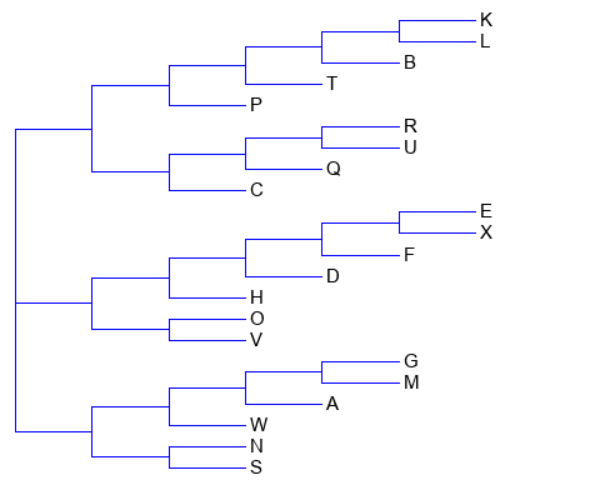